In [1]:
import numpy as np
import pandas as pd

from jcopml.automl import AutoRegressor

In [8]:
import jcopml

In [9]:
jcopml.__version__

'1.2.6'

# Import Data

In [2]:
df = pd.read_csv("data/Admission_Predict_Ver1.1.csv", index_col="Serial No.")
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
X = df.drop(columns="Chance of Admit ")
y = df["Chance of Admit "]

# Training

In [6]:
model = AutoRegressor(["GRE Score", "TOEFL Score", "CGPA", "SOP", "LOR "], ["University Rating", "Research"])

In [7]:
model.fit(X, y, cv=5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.0002800940363375679
algo__fit_intercept       | True
algo__l1_ratio            | 0.42340148070636974

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=False, n_neighbors=5)
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 0.8233060858274694
Valid: 0.8052866435311021
Test : 0.8211029994206265


# View Result

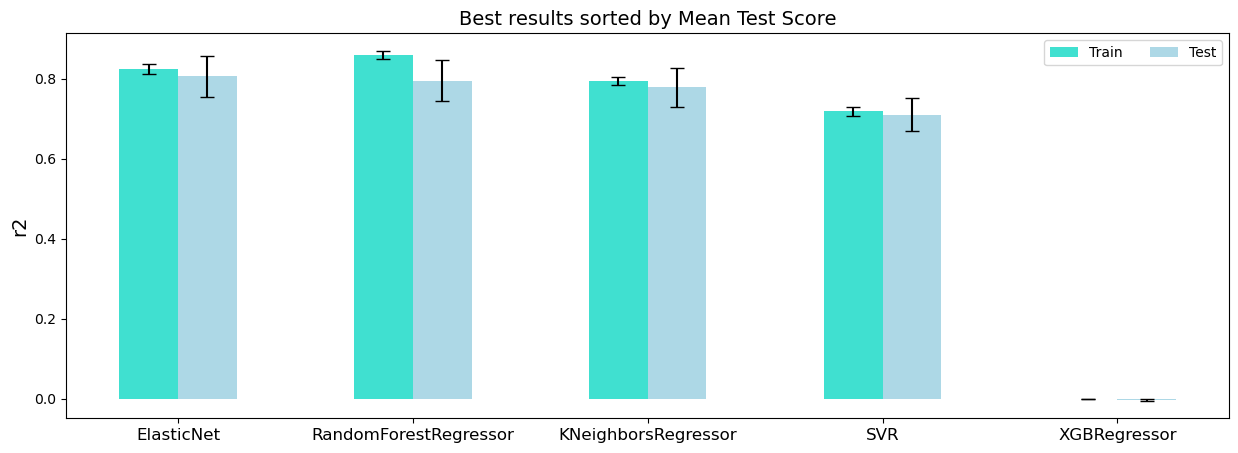

In [10]:
model.plot_results()

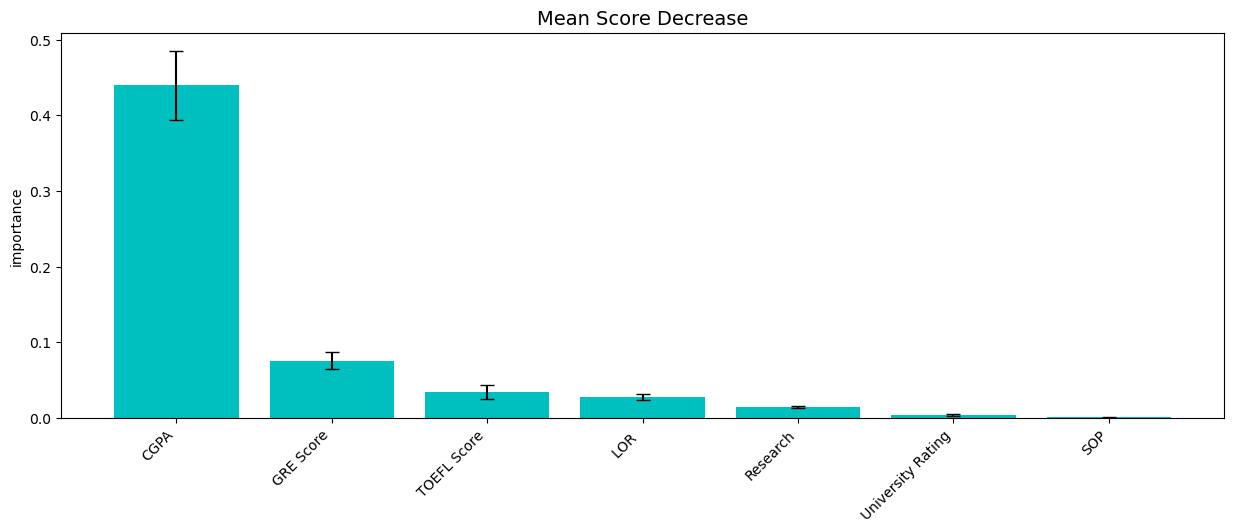

In [11]:
model.mean_score_decrease()

# Only ElasticNet

In [12]:
model.fit(X, y, cv=5, algo=["enet"], n_trial=100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.010609405001897948
algo__fit_intercept       | True
algo__l1_ratio            | 0.1682910421729306

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=False, strategy='median')
numerical_scaler          | RobustScaler

=========== Score ===========
Train: 0.8207370103166021
Valid: 0.8094320130345227
Test : 0.8163751092796905
